<a href="https://colab.research.google.com/github/bhoomireddyvijayakumari/House_prices_prediction/blob/main/House_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# 1: Load and Explore the Dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/house_prices.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object 
dtypes: float

In [5]:
print(df.describe())


              price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.140000e+03  4140.000000  4140.000000   4140.000000  4.140000e+03   
mean   5.530629e+05     3.400483     2.163043   2143.638889  1.469764e+04   
std    5.836865e+05     0.903939     0.784733    957.481621  3.587684e+04   
min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
25%    3.200000e+05     3.000000     1.750000   1470.000000  5.000000e+03   
50%    4.600000e+05     3.000000     2.250000   1980.000000  7.676000e+03   
75%    6.591250e+05     4.000000     2.500000   2620.000000  1.100000e+04   
max    2.659000e+07     8.000000     6.750000  10040.000000  1.074218e+06   

            floors   waterfront         view    condition   sqft_above  \
count  4140.000000  4140.000000  4140.000000  4140.000000  4140.000000   
mean      1.514130     0.007488     0.246618     3.452415  1831.351449   
std       0.534941     0.086219     0.790619     0.678533   861.382947   
min       

In [6]:
print(df.head())

                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-09 00:00:00   376000.0       3.0       2.00         1340      1384   
1  2014-05-09 00:00:00   800000.0       4.0       3.25         3540    159430   
2  2014-05-09 00:00:00  2238888.0       5.0       6.50         7270    130017   
3  2014-05-09 00:00:00   324000.0       3.0       2.25          998       904   
4  2014-05-10 00:00:00   549900.0       5.0       2.75         3060      7015   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     3.0           0     0          3        1340              0      2008   
1     2.0           0     0          3        3540              0      2007   
2     2.0           0     0          3        6420            850      2010   
3     2.0           0     0          3         798            200      2007   
4     1.0           0     0          5        1600           1460      1979   

   yr_renovated                   stre

In [7]:
# Check for missing values
print("\n Missing Values:")
print(df.isnull().sum())



 Missing Values:
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


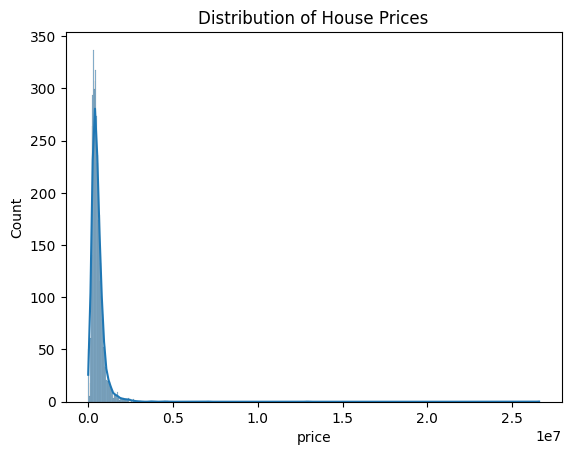

In [9]:
# Distributions
sns.histplot(df['price'], kde=True)
plt.title("Distribution of House Prices")
plt.show()


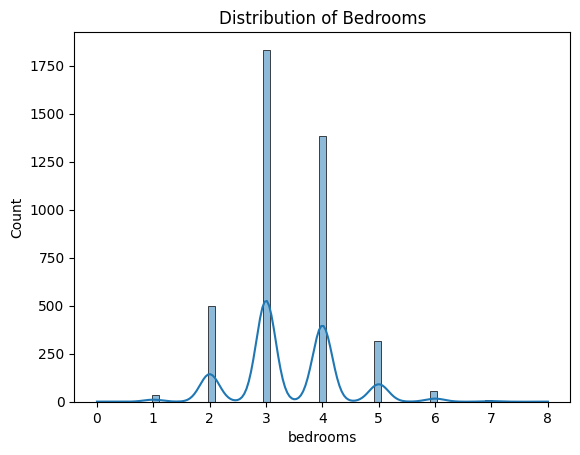

In [10]:
sns.histplot(df['bedrooms'], kde=True)
plt.title("Distribution of Bedrooms")
plt.show()


In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Select strong features
features = [
    'bedrooms', 'bathrooms', 'sqft_living',
    'floors', 'waterfront', 'view', 'condition',
     'sqft_above', 'sqft_basement', 'city'
]
target = 'price'

# Filter dataset
df = df[features + [target]].dropna()

X = df[features]
y = df[target]

In [28]:
#  Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Preprocessing: Scale numeric, encode categorical
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_features.remove('waterfront')  # keep as categorical
categorical_features = ['city', 'waterfront']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [29]:
# Model pipeline with GridSearchCV
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [10, 20, None],
    'regressor__min_samples_split': [2, 5],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, scoring='r2', verbose=2)
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['bedrooms',
                                                                          'bathrooms',
                                                                          'sqft_living',
                                                                          'floors',
                                                                          'view',
                                                                          'condition',
                                                                          'sqft_above',
                                                                          'sqft_basement']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['city',
                                                                          'waterfront'])])),
                                       ('regressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [10, 20, None],
                         'regressor__min_samples_split': [2, 5],
                         'regressor__n_estimators': [100, 200]},
             scoring='r2', verbose=2)

In [30]:
# Best model prediction
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\n BEST Parameters: {grid_search.best_params_}")
print(f" Final RMSE: {rmse:.2f}")
print(f" Final R² Score: {r2:.4f}")


 BEST Parameters: {'regressor__max_depth': None, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 200}
 Final RMSE: 233288.89
 Final R² Score: 0.4809


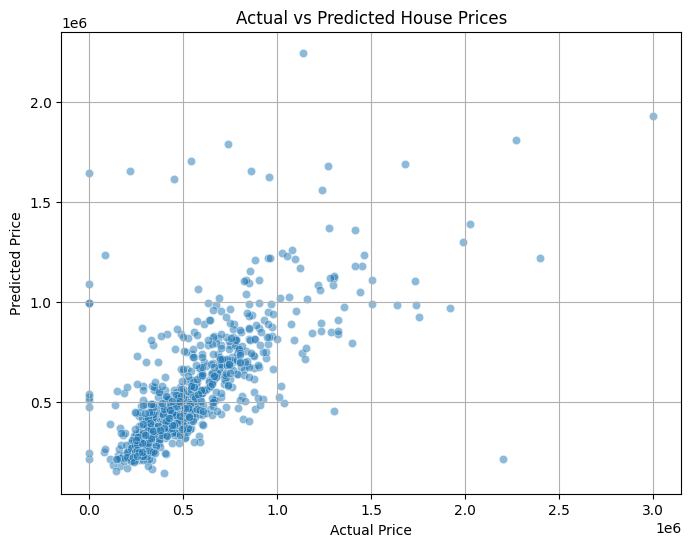

In [31]:
# Actual vs predicted plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()

Actual vs Predicted House Prices (Scatter Plot)

Points are generally clustered around the diagonal line, especially in the lower price range.

Deviations increase with higher price — model struggles more with luxury/high-end properties.

Indicates the model does a good job for common properties, less so for very high-value outliers.